In [ ]:
#V1: 0.9262864630208058 -- (139973/151112)
#V2: 0.9447892953570861 -- (142769/151112)
#V3: 0.9519958706125258--(143858/151112)
#--------------------------------------------------------
#V2: Xử lý ip_addess, tìm ra country --> sau đó enconding
#. Add thêm 1 feature 'country', thì thấy acc tăng từ 0.92 --> 0.94

#--------------------------------------------------------
#V2: Xử lý duration từ purchase_time và signup_time
# class 1 (fraud có timedelta_days = 0 tới 50%) trong khi class_0 chỉ có 0.08
#chứng tỏ các fraud vừa tạo ra account đã thực hiện giao dịch
#. Add thêm 1 feature 'timedelta_days', thì thấy acc tăng từ 0.94 --> 0.95

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from datetime import datetime

In [2]:
Fraud_Data_path = './Fraud_Data.csv'
IpAddress_to_Country_path = './IpAddress_to_Country.csv'


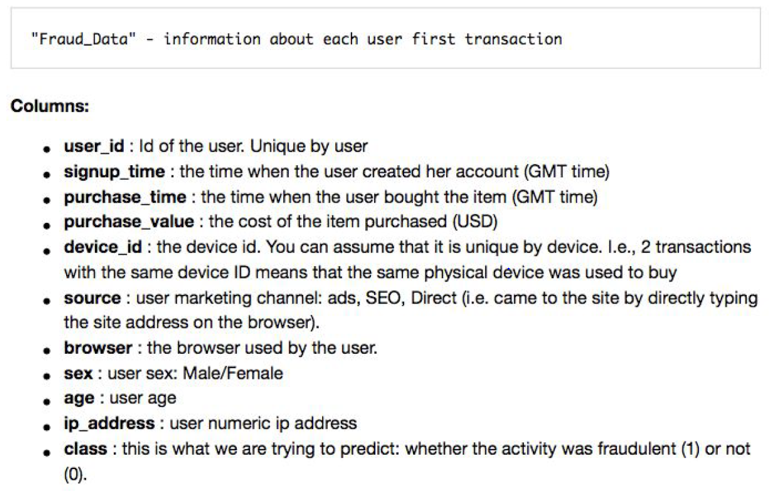

In [3]:
fraud_df = pd.read_csv(Fraud_Data_path)
ipAddress_to_country_df = pd.read_csv(IpAddress_to_Country_path)

#
ipAddress_to_country_df.head(-1)

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138840,3.758091e+09,3758092287,China
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China


In [4]:
def get_country(ip):
    df = ipAddress_to_country_df[ipAddress_to_country_df.lower_bound_ip_address <= ip]
    df = df[df.upper_bound_ip_address >= ip]
    #print(len(df['country'].to_numpy()))
    country = ''
    if (len(df['country'].to_numpy()) > 0):
        country = df['country'].to_numpy()[0]    
    return(country)

In [5]:
def get_duration_to_dataframe(signup_time, purchase_time):
    signup_time_obj = datetime.strptime(signup_time, '%Y-%m-%d %H:%M:%S')
    purchase_time = datetime.strptime(purchase_time, '%Y-%m-%d %H:%M:%S')
    timedelta = purchase_time - signup_time_obj #datetime.timedelta
    #dic
    dic = {}
    dic['timedelta_days'] = timedelta.days
    dic['timedelta_seconds'] = timedelta.seconds
    dic['timedelta_ticks'] = (timedelta.days * 24 * 60 * 60) + timedelta.seconds
    #
    ret = pd.Series(dic)
    return ret

In [6]:
timedelta_series =  fraud_df.apply(lambda row: get_duration_to_dataframe(row['signup_time'], row['purchase_time']), axis = 1)
timedelta_series

,timedelta_days,timedelta_seconds,timedelta_ticks
0,52,13882,4506682
1,0,17944,17944
2,0,1,1
3,5,60085,492085
4,50,41461,4361461
...,...,...,...
151107,60,77233,5261233
151108,10,67270,931270
151109,77,28816,6681616
151110,59,48519,5146119


In [7]:
fraud_df = pd.concat([fraud_df, timedelta_series], axis=1)
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,timedelta_days,timedelta_seconds,timedelta_ticks
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,52,13882,4506682
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,0,17944,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0,1,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,5,60085,492085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,50,41461,4361461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,60,77233,5261233
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,10,67270,931270
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,77,28816,6681616
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,59,48519,5146119


In [10]:
def cal_percent(class_value, column_str, value):
    total_class_by_value = fraud_df[fraud_df['class'] == class_value]
    total_class_by_column_with_value = total_class_by_value[total_class_by_value[column_str] == value]
    return(len(total_class_by_column_with_value) / len(total_class_by_value))

In [11]:
#Tính timedelta_days nếu class == 1 và timedelta_days = 0
cal_percent(1, 'timedelta_days', 0)

0.5404565048406473

In [12]:
#Tính timedelta_days nếu class == 0 và timedelta_days = 0
cal_percent(0, 'timedelta_days', 0)

0.008104496900577537

# class 1 (fraud có timedelta_days = 0 tới 50%) trong khi class_0 chỉ có 0.08

In [14]:
fraud_df['timedelta_days'] = fraud_df['timedelta_days'].apply(lambda value: 1 if value > 0 else 0)
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,timedelta_days,timedelta_seconds,timedelta_ticks
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1,13882,4506682
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,0,17944,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0,1,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,1,60085,492085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1,41461,4361461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,1,77233,5261233
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,1,67270,931270
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,1,28816,6681616
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,1,48519,5146119


In [30]:
_1_max = fraud_df[fraud_df['class'] == 1]['purchase_value'].max()
_1_min = fraud_df[fraud_df['class'] == 1]['purchase_value'].min()
_1_mean = fraud_df[fraud_df['class'] == 1]['purchase_value'].mean()
print('1: max: {}, min: {}, mean: {}'.format(_1_max, _1_min, _1_mean))

1: max: 111, min: 9, mean: 36.993004027983886


In [31]:
_0_max = fraud_df[fraud_df['class'] == 0]['purchase_value'].max()
_0_min = fraud_df[fraud_df['class'] == 0]['purchase_value'].min()
_0_mean = fraud_df[fraud_df['class'] == 0]['purchase_value'].mean()
print('1: max: {}, min: {}, mean: {}'.format(_0_max, _0_min, _0_mean))

1: max: 154, min: 9, mean: 36.92941786347939


In [32]:
#Apply contry by ip_address
fraud_df['country'] = fraud_df.apply(lambda row: get_country(row['ip_address']), axis = 1)

In [33]:
#https://www.kaggle.com/subinium/11-categorical-encoders-and-benchmark
#from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

fraud_df['source'] = label.fit_transform(fraud_df['source'])
fraud_df['browser'] = label.fit_transform(fraud_df['browser'])
fraud_df['sex'] = label.fit_transform(fraud_df['sex'])
fraud_df['device_id'] = label.fit_transform(fraud_df['device_id'])
fraud_df['country'] = label.fit_transform(fraud_df['country'])
#
fraud_df


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,timedelta_days,timedelta_seconds,timedelta_ticks,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,89215,2,0,1,39,7.327584e+08,0,1,13882,4506682,85
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,24078,0,0,0,53,3.503114e+08,0,0,17944,17944,172
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,131216,2,3,1,53,2.621474e+09,1,0,1,1,172
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,3977,2,4,1,41,3.840542e+09,0,1,60085,492085,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,68757,0,4,1,45,4.155831e+08,0,1,41461,4361461,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,125335,2,0,1,28,3.451155e+09,1,1,77233,5261233,172
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,63001,2,4,1,32,2.439047e+09,0,1,67270,931270,119
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,64204,2,2,0,26,2.748471e+09,0,1,28816,6681616,85
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,13118,2,0,1,37,3.601175e+09,0,1,48519,5146119,172


In [34]:
fealtures_to_use = ['class', 'purchase_value', 'source', 'browser', 'sex', 'age', 'country', 'timedelta_days']
train = fraud_df[[col for col in fealtures_to_use if col in fraud_df.columns]]

train

,class,purchase_value,source,browser,sex,age,country,timedelta_days
0,0,34,2,0,1,39,85,1
1,0,16,0,0,0,53,172,0
2,1,15,2,3,1,53,172,0
3,0,44,2,4,1,41,0,1
4,0,39,0,4,1,45,172,1
...,...,...,...,...,...,...,...,...
151107,1,43,2,0,1,28,172,1
151108,0,35,2,4,1,32,119,1
151109,0,40,2,2,0,26,85,1
151110,0,46,2,0,1,37,172,1


# Build model

In [35]:
import gc
import time
#ML Algoirthm

import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score

result_lgb = []
prediction = None #np.zeros((len(test_dataset), 5))
scores = []

enable_model_lightgbm = True
y = train['class']
X = train.drop(['class'], axis = 1)

objective = 'multiclass' #multiclass ; regression

#if (objective == 'regression'):
#    prediction = np.zeros((len(test_dataset)))
#else:
#    prediction = np.zeros((len(test_dataset), 5))
#---------------------------------------------
model = None
if (enable_model_lightgbm == True):
    #setup KFold
    n_fold = 5
    folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=15)
    
    #setup params
    params = {}    
    #
    if (objective == 'regression'):
        params = {'application': 'regression',
                  'boosting': 'gbdt',
                  'metric': 'rmse',
                  'num_leaves': 70,
                  'max_depth': 9,
                  'learning_rate': 0.01,
                  'bagging_fraction': 0.6,  # .85 previously
                  'feature_fraction': 0.6,  # .8 previously
                  'min_split_gain': 0.02,
                  'min_child_samples': 150,
                  'min_child_weight': 0.02,
                  'lambda_l2': 0.0475,
                  'verbosity': -1,
                  'data_random_seed': 17,
                  }
    else:        
        params = {'num_leaves': 512,
                #  'min_data_in_leaf': 60,
                 'objective': 'multiclass',
                 'max_depth': -1,
                 'learning_rate': 0.01,
                 "boosting": "gbdt",
                 "feature_fraction": 0.9,
                 "bagging_freq": 3,
                 "bagging_fraction": 0.9,
                 "bagging_seed": 11,
                  "lambda_l1": 0.1,
                  "lambda_l2": 0.1,
                 "random_state": 42,          
                 "verbosity": -1,
                 "num_class": 2}


    
    # Additional parameters:
    early_stop = 500
    verbose_eval = 500
    num_boost_round = 10000
    
    #
    idx = 0
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
        #chia tập train và valid
        gc.collect()
        print('Fold', fold_n + 1, 'started at', time.ctime(), 'total train')
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        #
        train_data = lgb.Dataset(X_train, label=y_train)
        valid_data = lgb.Dataset(X_valid, label=y_valid)

        #Build model lightgbm
        model = lgb.train(params,
                        train_data,
                        num_boost_round = num_boost_round,
                        valid_sets = [train_data, valid_data],
                        verbose_eval = verbose_eval,
                        early_stopping_rounds = early_stop)
        #prediction cho tập valid
        y_pred_valid = model.predict(X_valid, num_iteration=model.best_iteration)

        #
        y_valid = y_valid.to_numpy()
        y_pred_valid = y_pred_valid.argmax(1)
                
        print('y_valid.shape: ', y_valid.shape, y_valid)
        print('y_pred_valid.shape ', y_pred_valid.shape, y_pred_valid)
        #
        score = accuracy_score(y_valid, y_pred_valid)
        print('score: ', score)
        
        #
        result_dict = {}
        result_dict['valid'] = y_valid
        result_dict['prediction'] = y_pred_valid
        result_dict['idx'] = idx
        result_dict['score'] = score
        
        result_lgb.append(result_dict)
        #
        idx = idx + 1

               

Fold 1 started at Thu Aug  6 20:39:12 2020 total train
Training until validation scores don't improve for 500 rounds
[500]	training's multi_logloss: 0.150095	valid_1's multi_logloss: 0.193406
Early stopping, best iteration is:
[465]	training's multi_logloss: 0.152619	valid_1's multi_logloss: 0.193357
y_valid.shape:  (30224,) [0 0 0 ... 0 0 0]
y_pred_valid.shape  (30224,) [0 0 0 ... 0 0 0]
score:  0.9506021704605612
Fold 2 started at Thu Aug  6 20:40:19 2020 total train
Training until validation scores don't improve for 500 rounds
[500]	training's multi_logloss: 0.150076	valid_1's multi_logloss: 0.192799
[1000]	training's multi_logloss: 0.121581	valid_1's multi_logloss: 0.196837
Early stopping, best iteration is:
[511]	training's multi_logloss: 0.149278	valid_1's multi_logloss: 0.192736
y_valid.shape:  (30222,) [0 0 0 ... 0 0 0]
y_pred_valid.shape  (30222,) [1 0 0 ... 0 0 0]
score:  0.9509297862484283
Fold 3 started at Thu Aug  6 20:41:34 2020 total train
Training until validation score

In [36]:
result_lgb

[{'valid': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
  'prediction': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
  'idx': 0,
  'score': 0.9506021704605612},
 {'valid': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
  'prediction': array([1, 0, 0, ..., 0, 0, 0], dtype=int64),
  'idx': 1,
  'score': 0.9509297862484283},
 {'valid': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
  'prediction': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
  'idx': 2,
  'score': 0.9481503540467209},
 {'valid': array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
  'prediction': array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
  'idx': 3,
  'score': 0.9510290516842036},
 {'valid': array([1, 0, 0, ..., 0, 1, 0], dtype=int64),
  'prediction': array([1, 0, 0, ..., 0, 0, 0], dtype=int64),
  'idx': 4,
  'score': 0.9512937595129376}]

In [37]:
import pickle
# save the model to disk
filename = 'finalized_model_v3.sav'
pickle.dump(model, open(filename, 'wb'))

In [38]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [39]:
y_pred_valid = loaded_model.predict(X, num_iteration=model.best_iteration)

In [41]:
score = accuracy_score(y, y_pred_valid.argmax(1))
print('score: ', score)
#V1: 0.9262864630208058 -- (139973/151112)
#V2: 0.9447892953570861 (142769/151112)
#V3: 0.9519958706125258--(143858/151112)

score:  0.9519958706125258


In [42]:
score = accuracy_score(y, y_pred_valid.argmax(1), normalize=False)
print('total correct: ', score, len(y))

total correct:  143858 151112
